In [1]:
import pandas as pd
import numpy as np
import sklearn
from pylab import rcParams

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('churn_prediction.csv')
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [ ]:
#chceking total null values

In [4]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [5]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [6]:
df.shape

(28382, 21)

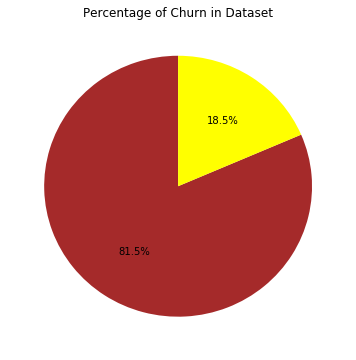

In [7]:
sizes = df['churn'].value_counts(sort = True)
colors = ["brown","yellow"] 
rcParams['figure.figsize'] = 6,6

plt.pie(sizes,colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=90,)
plt.title('Percentage of Churn in Dataset')
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x174e6148128>],
 'caps': [<matplotlib.lines.Line2D at 0x174e61d5b00>,
 'fliers': [<matplotlib.lines.Line2D at 0x174e61dcd30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x174e61dc518>],
 'whiskers': [<matplotlib.lines.Line2D at 0x174e6148a90>,
  <matplotlib.lines.Line2D at 0x174e6148c88>]}

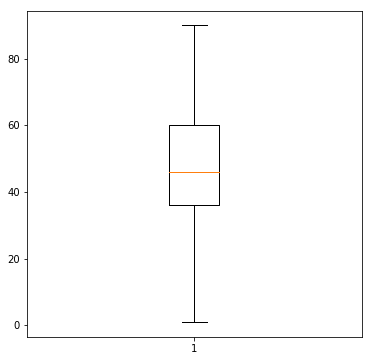

In [8]:
plt.boxplot(df['age'])

In [ ]:
#data cleansing and manupulation

In [9]:
df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [10]:
dict_gender={'Male':1,'Female':0}
df.replace({'gender':dict_gender},inplace=True)
df['gender']=df['gender'].fillna(-1)

In [11]:
df['gender'].value_counts()

 1.0    16548
 0.0    11309
-1.0      525
Name: gender, dtype: int64

In [12]:
df['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [13]:
df['dependents'].isnull().sum()

2463

In [14]:
df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [15]:
print(df['dependents'].mode()[0])
print(df['occupation'].mode()[0])

0.0
self_employed


In [16]:
df['dependents']=df['dependents'].fillna(df['dependents'].mode()[0])
df['occupation']=df['occupation'].fillna(df['dependents'].mode()[0])

In [17]:
df['city'].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
334.0      930
1232.0     840
623.0      778
15.0       669
575.0      631
1525.0     375
905.0      345
491.0      312
1111.0     312
1494.0     289
649.0      281
1589.0     251
318.0      245
1084.0     240
61.0       237
531.0      227
656.0      197
904.0      187
630.0      166
1181.0     150
1271.0     150
1076.0     133
745.0      130
996.0      119
621.0      114
          ... 
1179.0       1
1421.0       1
973.0        1
847.0        1
1001.0       1
1279.0       1
1137.0       1
1245.0       1
1594.0       1
948.0        1
1026.0       1
1166.0       1
1545.0       1
808.0        1
503.0        1
1300.0       1
1605.0       1
824.0        1
607.0        1
1011.0       1
728.0        1
1207.0       1
566.0        1
972.0        1
1448.0       1
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

In [18]:
df['city'].isnull().sum()

803

In [19]:
df['city']=df['city'].fillna(df['city'].mode()[0])

In [20]:
df['days_since_last_transaction'].value_counts()

0.0      1672
3.0       831
14.0      654
4.0       632
6.0       596
5.0       576
7.0       561
11.0      486
13.0      478
9.0       476
20.0      472
21.0      468
12.0      459
17.0      447
28.0      427
19.0      408
18.0      398
24.0      398
26.0      346
23.0      341
10.0      322
27.0      318
25.0      316
35.0      238
33.0      223
31.0      218
32.0      201
40.0      193
30.0      191
38.0      184
         ... 
246.0       3
295.0       3
337.0       3
197.0       3
190.0       3
365.0       3
176.0       2
211.0       2
302.0       2
267.0       2
169.0       2
148.0       2
323.0       2
106.0       2
128.0       2
150.0       2
274.0       2
183.0       1
225.0       1
155.0       1
309.0       1
351.0       1
134.0       1
92.0        1
232.0       1
170.0       1
218.0       1
334.0       1
288.0       1
321.0       1
Name: days_since_last_transaction, Length: 360, dtype: int64

In [21]:
df['days_since_last_transaction']=df['days_since_last_transaction'].fillna(999)

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [23]:
df=pd.concat([df,pd.get_dummies(df['occupation'],prefix=str('occupation'),prefix_sep='_')],axis=1)

In [24]:
num_cols=['customer_nw_category','current_balance','previous_month_end_balance','average_monthly_balance_prevQ',
          'average_monthly_balance_prevQ2','current_month_credit','previous_month_credit',
          'current_month_debit','previous_month_debit','current_month_balance',
          'previous_month_balance']
for i in num_cols:
    df[i]=np.log(df[i]+17000)

In [25]:
std=StandardScaler()
scaled=std.fit_transform(df[num_cols])
scaled=pd.DataFrame(scaled,columns=num_cols)

In [26]:
df_df_og=df.copy()
df=df.drop(num_cols,axis=1)
df=df.merge(scaled,left_index=True,right_index=True,how='left')

In [27]:
df.nunique()

customer_id                       28382
vintage                            5473
age                                  90
gender                                3
dependents                           15
occupation                            6
city                               1604
branch_code                        3185
days_since_last_transaction         361
churn                                 2
occupation_0.0                        2
occupation_company                    2
occupation_retired                    2
occupation_salaried                   2
occupation_self_employed              2
occupation_student                    2
customer_nw_category                  3
current_balance                   27903
previous_month_end_balance        27922
average_monthly_balance_prevQ     27801
average_monthly_balance_prevQ2    27940
current_month_credit              10411
previous_month_credit             10711
current_month_debit               13704
previous_month_debit              14010


In [28]:
y_all=df.churn
df=df.drop(['churn','customer_id','occupation'],axis=1)

In [29]:
df.nunique()

vintage                            5473
age                                  90
gender                                3
dependents                           15
city                               1604
branch_code                        3185
days_since_last_transaction         361
occupation_0.0                        2
occupation_company                    2
occupation_retired                    2
occupation_salaried                   2
occupation_self_employed              2
occupation_student                    2
customer_nw_category                  3
current_balance                   27903
previous_month_end_balance        27922
average_monthly_balance_prevQ     27801
average_monthly_balance_prevQ2    27940
current_month_credit              10411
previous_month_credit             10711
current_month_debit               13704
previous_month_debit              14010
current_month_balance             27944
previous_month_balance            27913
dtype: int64

In [31]:
basecols=['current_month_debit', 'previous_month_debit','current_balance','previous_month_end_balance','vintage'
                 ,'occupation_retired', 'occupation_salaried','occupation_self_employed', 'occupation_student']

In [32]:
df_baseline=df[basecols]

In [ ]:
#model building and training

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import KFold,StratifiedKFold

In [34]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve

In [35]:
train_x,test_x,train_y,test_y=tts(df_baseline,y_all,test_size=1/3,random_state=11,stratify=y_all)

In [36]:
model=LogisticRegression()
model.fit(train_x,train_y)
pred=model.predict_proba(test_x)[:,1]

In [37]:
pred

array([ 0.13776368,  0.17830407,  0.23862   , ...,  0.14999883,
        0.23971641,  0.15748766])

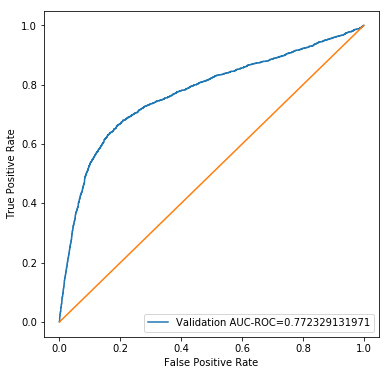

In [38]:
fpr,tpr,_=roc_curve(test_y,pred)
auc=roc_auc_score(test_y,pred)
plt.plot(figsize=(12,8))
plt.plot(fpr,tpr,label='Validation AUC-ROC='+str(auc))
x=np.linspace(0,1,1000)
plt.plot(x,x,linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [39]:
pred_val=model.predict(test_x)

In [40]:
label_preds=pred_val
cm=confusion_matrix(test_y,label_preds)

cm

array([[7589,  119],
       [1526,  227]])

In [41]:
def cv_score(ml_model,rstate=12,thres=0.5,cols=df.columns):
    i=1
    cv_scores=[]
    df1=df.copy()
    df1=df[cols]
    
    kf=StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y_all):
        print('\n{} of KFold {}'.format(i,kf.n_splits))
        xtr,xvl=df1.loc[df_index],df1.loc[test_index]
        ytr,yvl=y_all.loc[df_index],y_all.loc[test_index]
        
        model=ml_model
        model.fit(xtr,ytr)
        pred_probs=model.predict_proba(xvl)
        pp=[]
        
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)
                
        pred_val=pp
        roc_score=roc_auc_score(yvl,pred_probs[:,1])
        recall=recall_score(yvl,pred_val)
        precision=precision_score(yvl,pred_val)
        m=""
        m+="ROC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score,recall,precision)
        print("{}".format(m))
        
        cv_scores.append(roc_score)
        i+=1
    return cv_scores
        

In [42]:
#evaluating modelperfromance using ROC Recall and precision as a matrix

In [ ]:
#predicting using base columns and logistic regression

In [43]:
baseline_scores=cv_score(LogisticRegression(), cols=basecols)


1 of KFold 5
ROC Score: 0.7676469016545062, Recall Score: 0.1245, Precision Score: 0.6453 

2 of KFold 5
ROC Score: 0.7682690370979344, Recall Score: 0.1359, Precision Score: 0.6714 

3 of KFold 5
ROC Score: 0.7712503042482929, Recall Score: 0.1321, Precision Score: 0.6178 

4 of KFold 5
ROC Score: 0.7689659751733393, Recall Score: 0.1312, Precision Score: 0.6699 

5 of KFold 5
ROC Score: 0.75780211855487, Recall Score: 0.1236, Precision Score: 0.6341 


In [ ]:
#predicting using all features and logistic regression

In [44]:
all_feat_scores=cv_score(LogisticRegression())


1 of KFold 5
ROC Score: 0.7912319391634981, Recall Score: 0.2139, Precision Score: 0.7329 

2 of KFold 5
ROC Score: 0.7899116226492653, Recall Score: 0.1835, Precision Score: 0.7070 

3 of KFold 5
ROC Score: 0.8057633671898641, Recall Score: 0.2338, Precision Score: 0.7410 

4 of KFold 5
ROC Score: 0.7925943498625125, Recall Score: 0.1996, Precision Score: 0.7143 

5 of KFold 5
ROC Score: 0.7808945639875275, Recall Score: 0.1797, Precision Score: 0.6949 


In [ ]:
#prediction using all features and randomforest classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf_all_features=cv_score(RandomForestClassifier(n_estimators=100,max_depth=9))


1 of KFold 5
ROC Score: 0.8348036173055184, Recall Score: 0.3812, Precision Score: 0.7580 

2 of KFold 5
ROC Score: 0.820831158154352, Recall Score: 0.3432, Precision Score: 0.7220 

3 of KFold 5
ROC Score: 0.8389262255450156, Recall Score: 0.3888, Precision Score: 0.7546 

4 of KFold 5
ROC Score: 0.836895368189772, Recall Score: 0.3631, Precision Score: 0.7389 

5 of KFold 5
ROC Score: 0.8333876731748392, Recall Score: 0.3679, Precision Score: 0.7618 


In [47]:
results_df=pd.DataFrame({'baseline':baseline_scores,'all_feats':all_feat_scores,'random_forest':rf_all_features})

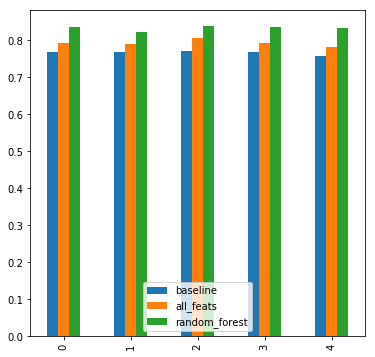

In [48]:
results_df.plot(y=['baseline','all_feats','random_forest'],kind='bar')